In [1]:
import pandas as pd 
import numpy as np
pd.set_option("display.max_columns", None)
import dataframe_image as dfi
import re
pd.set_option('display.float_format', str)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text

from datetime import datetime, tzinfo
from dateutil import tz
import pytz

plt.rcParams['font.family'] = 'Nunito'
plt.rcParams['font.size'] = 10


In [2]:
%run path_changer_genesys.py

In [3]:
font_name = 'Nunito'
font_size = 10
orange_color = '#EFBA50'
blue_color = '#80ADF7'
grey_color = '#B0BCC8'

In [4]:
gen_df_1 = pd.read_csv(source_file_path+file1)

In [5]:
gen_df_1['conversationstart'].min(), gen_df_1['conversationstart'].max()

('2021-11-01T00:02:01.199Z', '2021-11-29T23:59:55.429Z')

In [6]:
gen_df_2 = pd.read_csv(source_file_path+file2)

In [7]:
gen_df_2['conversationstart'].min(), gen_df_2['conversationstart'].max()

('2021-12-01T00:00:02.183Z', '2022-01-08T23:52:27.219Z')

In [8]:
gen_df_3 = pd.read_csv(source_file_path+file3)

In [9]:
gen_df_3['conversationstart'].min(), gen_df_3['conversationstart'].max()

('2022-01-01T00:00:34.422Z', '2022-02-03T22:59:44.492Z')

In [10]:
gen_df_1['conversationstart'].dtype, gen_df_2['conversationstart'].dtype, gen_df_3['conversationstart'].dtype

(dtype('O'), dtype('O'), dtype('O'))

In [11]:
df1 = gen_df_1.append(gen_df_2)

In [12]:
df1['conversationstart'].min(), df1['conversationstart'].max()

('2021-11-01T00:02:01.199Z', '2022-01-08T23:52:27.219Z')

In [13]:
gen_df = df1.append(gen_df_3)

In [14]:
gen_df['conversationstart'].min(), gen_df['conversationstart'].max()

('2021-11-01T00:02:01.199Z', '2022-02-03T22:59:44.492Z')

In [15]:
gen_df['conversationstart'] = pd.to_datetime(gen_df['conversationstart'])

In [16]:
# gen_df['conversationstart'] = pd.to_datetime(gen_df['conversationstart']).dt.tz_localize('utc')
gen_df['conversationstart'] = pd.to_datetime(gen_df['conversationstart']).dt.tz_convert('mst')

In [17]:
gen_df['conversationstart'].dtype

datetime64[ns, MST]

In [18]:
gen_df['conversationstart'].min(), gen_df['conversationstart'].max()

(Timestamp('2021-10-31 17:02:01.199000-0700', tz='MST'),
 Timestamp('2022-02-03 15:59:44.492000-0700', tz='MST'))

In [19]:
gen_final_df = gen_df.copy()

In [20]:
gen_final_df['metrics_value_sec'] = gen_final_df['metrics_value']*0.001

In [21]:
gen_final_df['metrics_value_min'] = gen_final_df['metrics_value_sec']/60

In [22]:
gen_final_df = gen_final_df.replace(['NY-BR'], 'NY-BK')
gen_final_df = gen_final_df.replace(['PX', 'Px'], 'Patient Experience')
gen_final_df = gen_final_df.replace(['I.T'], 'IT')
gen_final_df = gen_final_df.replace(['Rx Billing', 'Rx Pharmacist', 'Rx Filling', 'Rx IBD', 'RX'], 'Rx')
gen_final_df = gen_final_df.replace(['Delivery - Non-Driver'], 'Delivery')
gen_final_df = gen_final_df.replace(['Operations - HQ'], 'Operations')
gen_final_df = gen_final_df.replace(['Employee Experience'], 'HR')
gen_final_df = gen_final_df.replace(['Development/Design'], 'Development & Design')

In [23]:
required_ques = ['md-bal-px-queue --- IBOB','nj-som-px-queue --- IBOB', 'ny-bk-31-px-queue --- IBOB','ny-man-103-px-queue --- IBOB','pa-phi-px-queue --- IBOB','MyMedly --- IBOB']
gen_final_df = gen_final_df[gen_final_df['queue_name'].isin(required_ques)]

In [24]:
gen_final_df.queue_name.unique()

array(['ny-bk-31-px-queue --- IBOB', 'nj-som-px-queue --- IBOB',
       'md-bal-px-queue --- IBOB', 'MyMedly --- IBOB',
       'pa-phi-px-queue --- IBOB', 'ny-man-103-px-queue --- IBOB'],
      dtype=object)

In [25]:
gen_final_df['media_type'].unique()

array(['voice', 'callback', 'message'], dtype=object)

In [26]:
gen_final_df['conversationstart'] = pd.to_datetime(gen_final_df['conversationstart'])
gen_final_df['months'] = gen_final_df['conversationstart'].dt.strftime('%b-%Y')

In [27]:
gen_final_df['months'].value_counts()

Jan-2022    1247576
Dec-2021    1077977
Nov-2021     948849
Feb-2022     118209
Name: months, dtype: int64

In [28]:
gen_final_df.queue_name.value_counts()

ny-bk-31-px-queue --- IBOB      1618811
nj-som-px-queue --- IBOB        1027140
pa-phi-px-queue --- IBOB         337655
ny-man-103-px-queue --- IBOB     146158
md-bal-px-queue --- IBOB         145591
MyMedly --- IBOB                 117256
Name: queue_name, dtype: int64

In [29]:
from datetime import datetime
var1 = datetime.now().strftime('%Y-%m-%d')

In [30]:
#change
from datetime import date
from dateutil.relativedelta import relativedelta
today = date.today()
currentmonth = today.strftime("%b-%Y")

thirdmonth = (today - relativedelta(months=third_m)).strftime("%b-%Y") #gets you today-1 month

secondmonth = (today - relativedelta(months=second_m)).strftime("%b-%Y") #gets you today-2 moth

firstmonth =  (today - relativedelta(months=first_m)).strftime("%b-%Y") # gets you today-3 month
# print(lastMonth.strftime("%b-%Y"))

In [31]:
currentmonth, firstmonth, secondmonth, thirdmonth

('Mar-2022', 'Nov-2021', 'Dec-2021', 'Jan-2022')

In [32]:
months_list = [firstmonth, secondmonth, thirdmonth]

In [33]:
gen_final_df = gen_final_df[(gen_final_df['months'].isin(months_list))]

In [34]:
gen_final_df['months'].value_counts()

Jan-2022    1247576
Dec-2021    1077977
Nov-2021     948849
Name: months, dtype: int64

In [35]:
gen_final_df = gen_final_df.replace(['ny-bk-31-px-queue --- IBOB'], 'NY-BK')
gen_final_df = gen_final_df.replace(['md-bal-px-queue --- IBOB'], 'MD-BA')
gen_final_df = gen_final_df.replace(['pa-phi-px-queue --- IBOB'], 'PA-PH')
gen_final_df = gen_final_df.replace(['nj-som-px-queue --- IBOB'], 'NJ-SO')
gen_final_df = gen_final_df.replace(['ny-man-103-px-queue --- IBOB'], 'NY-MA')
gen_final_df = gen_final_df.replace(['MyMedly --- IBOB'], 'My Medly')

# Peak Hour Final

In [36]:
time_df = gen_final_df.copy()

In [37]:
time_df['conversationstart_time'] = time_df['conversationstart'].dt.time
time_df['conversationstart_hr'] = time_df['conversationstart'].dt.hour
time_df['conversationstart_date'] = time_df['conversationstart'].dt.date

In [38]:
kpi_peak_time = time_df[time_df['metrics'] == 'nOffered']
# kpi_peak_time = kpi_peak_time[kpi_peak_time['metrics_value_sec'] > 10]
kpi_peak_time = kpi_peak_time[kpi_peak_time['originatingdirection'] == 'inbound']
kpi_peak_time = kpi_peak_time.drop_duplicates(subset = ['conversationid'])
kpi_peak_time.head()

,Unnamed: 0,conversationid,conversationstart,conversationend,originatingdirection,ani,dnis,media_type,userid,queueid,queue_name,name,department,title,email,wrapupcode,metrics,metrics_value,emitdate,sha256,metrics_value_sec,metrics_value_min,months,conversationstart_time,conversationstart_hr,conversationstart_date
4893,4893,195a19f2-37c5-4ece-bcf5-c34a884e9e35,2021-11-14 13:39:09.641000-07:00,2021-11-14T21:08:12.819Z,inbound,tel:+19177151806,tel:+17187827539,voice,NaN,1de8d992-d42d-4e19-9ef0-9c1737ddfc0c,NY-BK,NaN,NaN,NaN,NaN,NaN,nOffered,1.0,2021-11-14T20:39:38.631Z,213708fcf8899ed12d8b1cd6c0037ad176d52912e4e6a9...,0.001,1.6666666666666667e-05,Nov-2021,13:39:09.641000,13,2021-11-14
5650,5650,a875c91e-2956-44a2-95c9-c943ac00f09d,2021-11-14 13:46:39.534000-07:00,2021-11-14T21:12:08.442Z,inbound,tel:+16467327150,tel:+17187827539,voice,NaN,1de8d992-d42d-4e19-9ef0-9c1737ddfc0c,NY-BK,NaN,NaN,NaN,NaN,NaN,nOffered,1.0,2021-11-14T20:47:05.978Z,1216a3a1df17b15be3ac039ac80c6506ffa342fed882e4...,0.001,1.6666666666666667e-05,Nov-2021,13:46:39.534000,13,2021-11-14
6018,6018,b5af2bfb-092e-40b8-944a-5b7cdedee91d,2021-11-14 14:10:05.753000-07:00,2021-11-14T21:18:31.924Z,inbound,tel:+16505090504,tel:+17187827539,voice,NaN,1de8d992-d42d-4e19-9ef0-9c1737ddfc0c,NY-BK,NaN,NaN,NaN,NaN,NaN,nOffered,1.0,2021-11-14T21:10:30.642Z,688c6cd7f39cd8a037c92494eb77311a8c2dcbe493cd46...,0.001,1.6666666666666667e-05,Nov-2021,14:10:05.753000,14,2021-11-14
6053,6053,e57e70dc-d3f1-4c7a-a0e5-aea67047c9a8,2021-11-14 14:12:03.914000-07:00,2021-11-14T21:15:25.339Z,inbound,tel:+19292576216,tel:+17187827539,voice,NaN,1de8d992-d42d-4e19-9ef0-9c1737ddfc0c,NY-BK,NaN,NaN,NaN,NaN,NaN,nOffered,1.0,2021-11-14T21:12:18.379Z,3302b4d8fed3a4eca4ff377d3776e39f5ebf07ff62a648...,0.001,1.6666666666666667e-05,Nov-2021,14:12:03.914000,14,2021-11-14
6807,6807,93eeda3c-44bb-43d7-a8af-e612647874e5,2021-11-14 14:20:23.880000-07:00,2021-11-14T21:26:45.306Z,inbound,tel:+12086075092,tel:+17187827539,voice,NaN,1de8d992-d42d-4e19-9ef0-9c1737ddfc0c,NY-BK,NaN,NaN,NaN,NaN,NaN,nOffered,1.0,2021-11-14T21:20:54.716Z,58cf0a7a67ba75ce9eec0c2ebc4a45f56265120a351a98...,0.001,1.6666666666666667e-05,Nov-2021,14:20:23.880000,14,2021-11-14


In [39]:
kpi_peak_time.drop_duplicates(subset = 'conversationid', inplace = True)

In [40]:
kpi_peak_time_pvt = pd.pivot_table(kpi_peak_time, values = ['conversationid', 'metrics_value_min'], index = ['months', 'conversationstart_date', 'conversationstart_hr'], aggfunc = {'conversationid': 'count', 'metrics_value_min': np.mean}).reset_index()
kpi_peak_time_pvt.columns = ['months', 'conversationstart_date', 'conversationstart_hr', 'count_of_calls', 'avg_duration']
# kpi_peak_time_pivot = kpi_peak_time_pivot.droplevel(0)
kpi_peak_time_pvt.sort_values(by = 'conversationstart_hr', inplace = True)
# kpi_peak_time_pvt = kpi_peak_time_pvt.drop_duplicates(subset = ['conversationstart_date', 'conversationstart_hr'])
kpi_peak_time_pvt

,months,conversationstart_date,conversationstart_hr,count_of_calls,avg_duration
772,Nov-2021,2021-11-03,5,31,1.666666666666667e-05
112,Dec-2021,2021-12-10,5,2,1.6666666666666667e-05
746,Nov-2021,2021-11-01,5,31,1.666666666666667e-05
199,Dec-2021,2021-12-17,5,1,1.6666666666666667e-05
785,Nov-2021,2021-11-04,5,34,1.666666666666667e-05
...,...,...,...,...,...
38,Dec-2021,2021-12-03,18,9,1.666666666666667e-05
843,Nov-2021,2021-11-08,18,6,1.666666666666667e-05
1082,Nov-2021,2021-11-30,18,7,1.666666666666667e-05
111,Dec-2021,2021-12-09,19,2,1.6666666666666667e-05


In [41]:
kpi_peak_time_pvt['datecol'] = pd.to_datetime(kpi_peak_time_pvt['conversationstart_date']).dt.strftime('%Y-%m-%d')
kpi_peak_time_pvt['daysinmonths'] = kpi_peak_time_pvt['datecol'].apply(lambda t: pd.Period(t, freq='S').days_in_month)
kpi_peak_time_pvt['daysinmonths']

772     30
112     31
746     30
199     31
785     30
        ..
38      31
843     30
1082    30
111     31
198     31
Name: daysinmonths, Length: 1083, dtype: int64

In [42]:
new_df = pd.pivot_table(kpi_peak_time_pvt, values = ['count_of_calls', 'avg_duration'], index = ['months', 'conversationstart_hr','daysinmonths'] , aggfunc = {'count_of_calls': np.sum, 'avg_duration': np.mean}).reset_index()
# new_df['avg_duration'] = new_df.avg_duration.round().astype(int)

In [43]:
new_df['Average_interactions'] = (new_df['count_of_calls']/new_df['daysinmonths']).astype(int)

In [44]:
new_df.rename(columns = {'count_of_calls':'sum_of_calls', 'Average_interactions':'count_of_calls'}, inplace = True)

In [45]:
all_hours = pd.Series(data = range(0 , 24))

In [46]:
# Avg calls for the day
missing_hour_df =pd.DataFrame()
new_peak = pd.DataFrame()
for i in new_df.months.unique():
    month_df = new_df[new_df['months'] == i]
    missing_hours = all_hours[~all_hours.isin(month_df.conversationstart_hr)]
    missing_df = pd.DataFrame({'months':i, 'conversationstart_hr' : missing_hours.values , 'count_of_calls' : 0, 'avg_duration': 0})
    missing_hour_df = missing_hour_df.append(missing_df)
new_peak = new_df.append(missing_hour_df, ignore_index=True)


In [47]:
def bin_table(x):
    if x == 0  :
        return '0-1'
    elif x == 1:
        return '1-2'
    elif x == 2:
        return '2-3'
    elif x == 3:
        return '3-4'
    elif x == 4:
        return '4-5'
    elif x == 5:
        return '5-6'
    elif x == 6:
        return '6-7'
    elif x == 7:
        return '7-8'
    elif x == 8:
        return '8-9'
    elif x == 9:
        return '9-10'
    elif x == 10:
        return '10-11'
    elif x == 11:
        return '11-12'
    elif x == 12:
        return '12-13'
    elif x == 13:
        return '13-14'
    elif x == 14:
        return '14-15'
    elif x == 15:
        return '15-16'
    elif x == 16:
        return '16-17'
    elif x == 17:
        return '17-18'
    elif x == 18:
        return '18-19'
    elif x == 19:
        return '19-20'
    elif x == 20:
        return '20-21'
    elif x == 21:
        return '21-22'
    elif x == 22:
        return '22-23'
    else:
        return '23-0'

In [48]:
new_peak['new_col'] = new_peak['conversationstart_hr'].apply(lambda x:bin_table(x)) 

In [49]:
new_peak.months.value_counts()

Nov-2021    24
Dec-2021    24
Jan-2022    24
Name: months, dtype: int64

In [50]:
new_peak = new_peak.sort_values(by = 'conversationstart_hr')

In [51]:
import re

_nsre = re.compile('([0-23]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)] 

In [52]:
var = months_list
var

['Nov-2021', 'Dec-2021', 'Jan-2022']

findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


Jan-2022 3_kpi_peak_hour_overall.png


findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


Nov-2021 1_kpi_peak_hour_overall.png
Dec-2021 2_kpi_peak_hour_overall.png


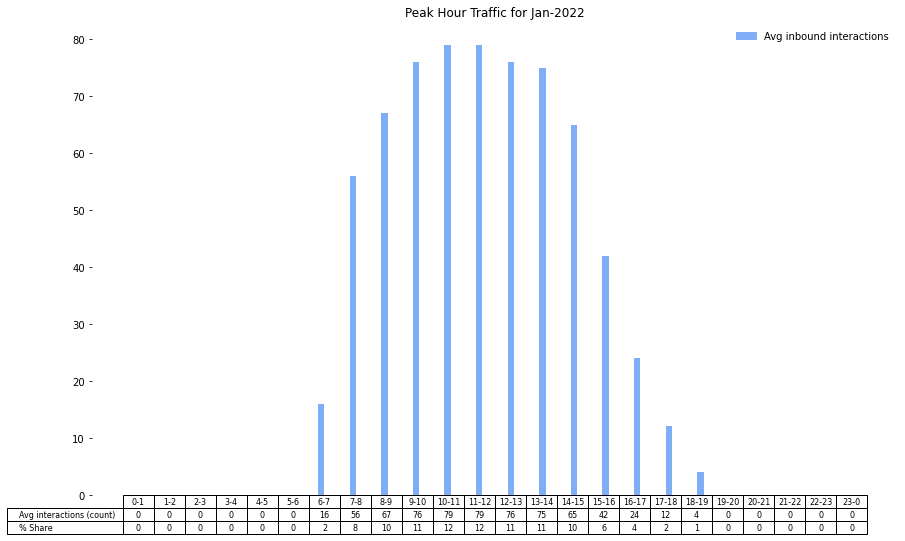

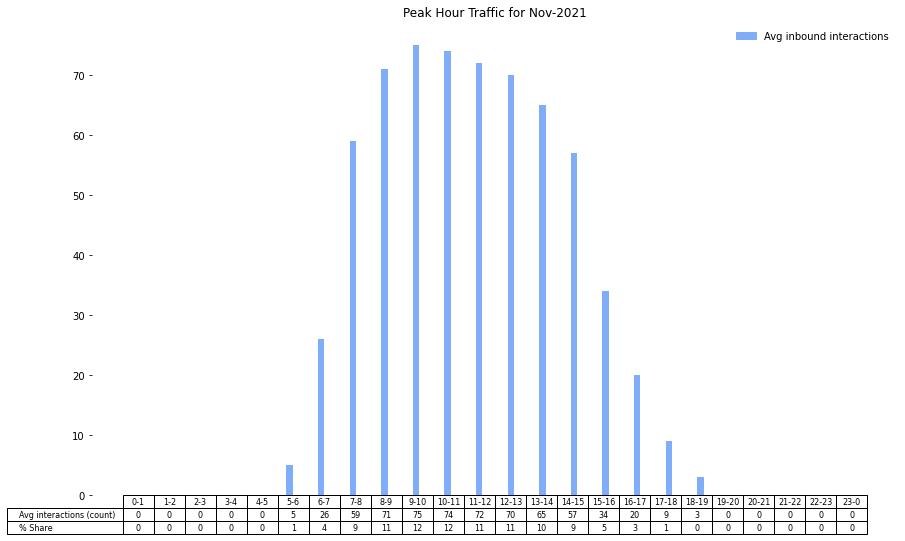

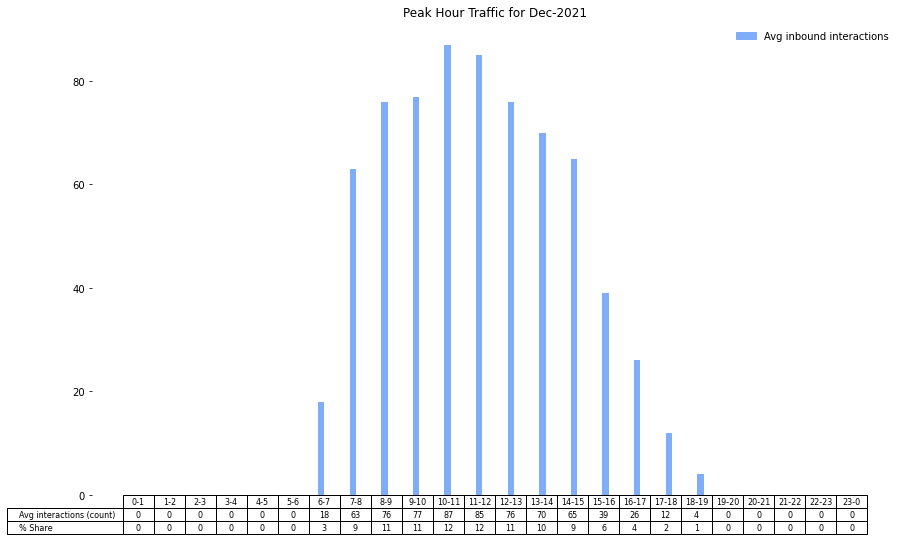

In [53]:
#Overall
for i in new_peak.months.unique() :
    new = new_peak[new_peak.months == i].reset_index(drop=True).drop('months', axis = 1)

    new = new[['new_col', 'count_of_calls']].groupby('new_col', sort = False).sum().reset_index()

    plt.figure(figsize=(16,8))

    dd = new.count_of_calls.values.tolist()
#     cc = new.avg_duration.values.tolist()
    
    data = [[round(elt/sum(dd)*100) for elt in dd], dd]  #share calculation
    columns = new.new_col.values
    rows = ['Avg interactions (count)', '% Share']#['%d year' % x for x in (100, 50, 20, 10, 5)]
    
    n_rows = len(data)
    index = np.arange(len(columns)) + 0.0
    bar_width = 0.2

#     # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.zeros(len(columns))
#     # Plot bars and create text labels for the table
    cell_text = []
    for row in range(n_rows):
        ax = plt.bar(index, data[row], bar_width, bottom = y_offset, color = blue_color, tick_label=new.count_of_calls)
        y_offset = y_offset + data[row]
        cell_text.append(['%d' % (x) for x in y_offset])
        y_offset = np.zeros(len(columns))
       
     # Reverse colors and text labels to display the last value at the top.
    cell_text.reverse()
    rects = ax.patches


#     # Add a table at the bottom of the axes
    the_table = plt.table(cellText=cell_text, cellLoc='center', rowLabels=rows, colLabels=columns, loc='bottom', colWidths = [1.0 / 26] * 26)

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(8)

    # Adjust layout to make room for the table:
    plt.subplots_adjust(left=0.2, bottom=0.06)
#     orange_patch = mpatches.Patch(color='orange', label='outbound call ')
    blue_patch = mpatches.Patch(color=blue_color, label='Avg inbound interactions')
    plt.legend(handles=[blue_patch], loc='upper right', bbox_to_anchor=(1, 1), frameon=False)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['left'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.gca().spines['bottom'].set_color('none')

    plt.xticks([])
#     plt.axis('off')
    plt.title(f'Peak Hour Traffic for {i}')
    v = var.index(i)
    print(i,str(v+1)+'_kpi_peak_hour_overall.png')

    plt.savefig(output_image_path_KPI_ALL+str(v+1)+'_kpi_12_peak_hour_overall.png', bbox_inches='tight', dpi=300,pad_inches = 0)

#     plt.show()

# Location

In [54]:
new_df_loc = pd.pivot_table(kpi_peak_time, values = ['conversationid', 'metrics_value_min'], index = ['months', 'queue_name', 'conversationstart_date', 'conversationstart_hr'] , aggfunc = {'conversationid': 'count', 'metrics_value_min': np.mean}).reset_index()

In [55]:
new_df_loc['datecol'] = pd.to_datetime(new_df_loc['conversationstart_date']).dt.strftime('%Y-%m-%d')
new_df_loc['daysinmonths'] = new_df_loc['datecol'].apply(lambda t: pd.Period(t, freq='S').days_in_month)

In [56]:
new_df_peak_loc = pd.pivot_table(new_df_loc, values = ['conversationid','metrics_value_min'] , index = ['months', 'queue_name', 'conversationstart_hr','daysinmonths'], aggfunc = {'conversationid': np.sum, 'metrics_value_min': np.mean}).reset_index()

In [57]:
new_df_peak_loc['Average_of_calls'] = (new_df_peak_loc['conversationid']/new_df_peak_loc['daysinmonths']).astype(int)

In [58]:
# weekin = ['Dec-2021	','Oct-2021']
# weekend = ['Nov-2021']
# new_df_peak_loc['Average_of_calls'] = (np.where(new_df_peak_loc['months'].isin(weekin), new_df_peak_loc['conversationid']/31, new_df_peak_loc['conversationid']/30)).astype(int)

In [59]:
new_df_peak_loc.rename(columns = {'conversationid':'sum','Average_of_calls':'conversationid'}, inplace = True)

In [60]:
# Avg calls for the day
missing_hour_df_loc =pd.DataFrame()
new_peak_loc = pd.DataFrame()
for i in new_df_peak_loc.queue_name.unique():
    loc_df = new_df_peak_loc[new_df_peak_loc['queue_name'] == i]
    for j in loc_df.months.unique():
        months_df = loc_df[loc_df['months'] ==j]
        missing_hours_loc = all_hours[~all_hours.isin(months_df.conversationstart_hr)]
        missing_df_loc = pd.DataFrame({'months': j, 'queue_name':i, 'conversationstart_hr' : missing_hours_loc.values , 'conversationid' : 0})
        missing_hour_df_loc = missing_hour_df_loc.append(missing_df_loc)
new_peak_loc = new_df_peak_loc.append(missing_hour_df_loc, ignore_index=True)


In [61]:
new_peak_loc['new_col'] = new_peak_loc['conversationstart_hr'].apply(lambda x:bin_table(x)) 

In [62]:

new_peak_loc = new_peak_loc.sort_values(by = 'conversationstart_hr')

In [63]:
new_peak_loc.months.value_counts()

Nov-2021    144
Jan-2022    144
Dec-2021    144
Name: months, dtype: int64

In [64]:
import re

_nsre = re.compile('([0-23]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)] 

In [65]:
new_peak_loc.rename(columns = {'conversationid' : 'count_of_calls', 'metrics_value_min': 'avg_duration'}, inplace = True)

In [66]:
# required_ques = ['md-bal-px-queue --- IBOB','nj-som-px-queue --- IBOB', 'ny-bk-31-px-queue --- IBOB','ny-man-103-px-queue --- IBOB','pa-phi-px-queue --- IBOB','MyMedly --- IBOB']
# new_peak_loc = new_peak_loc[new_peak_loc['queue_name'].isin(required_ques)]
new_peak_loc['queue_name'].unique()

array(['MD-BA', 'NJ-SO', 'My Medly', 'NY-BK', 'PA-PH', 'NY-MA'],
      dtype=object)

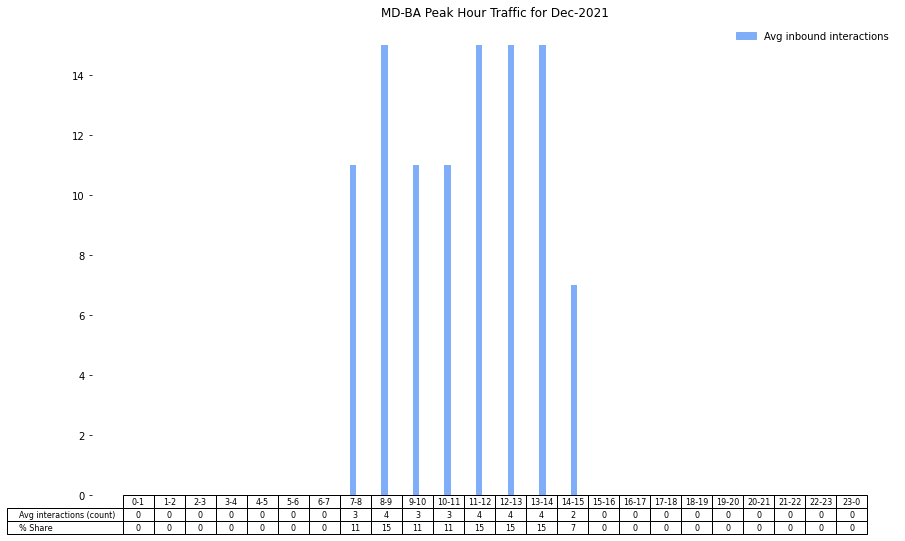

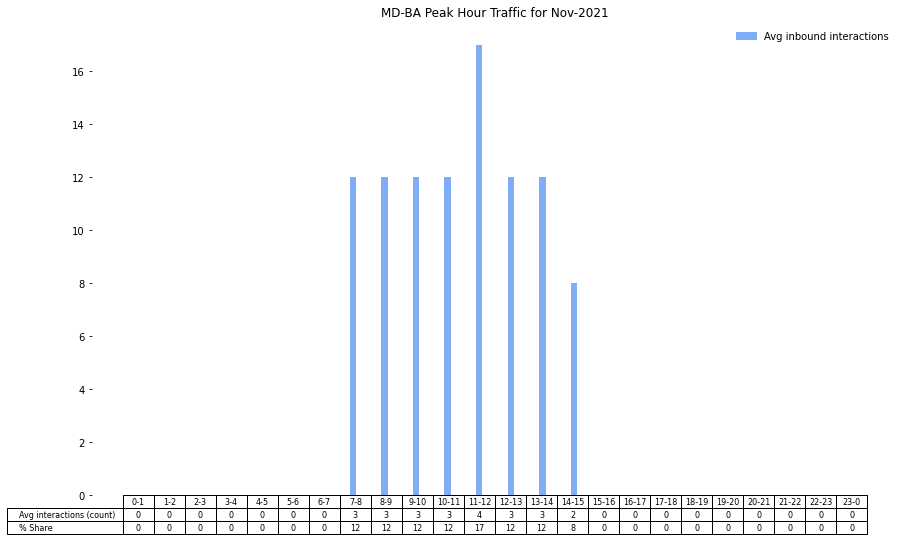

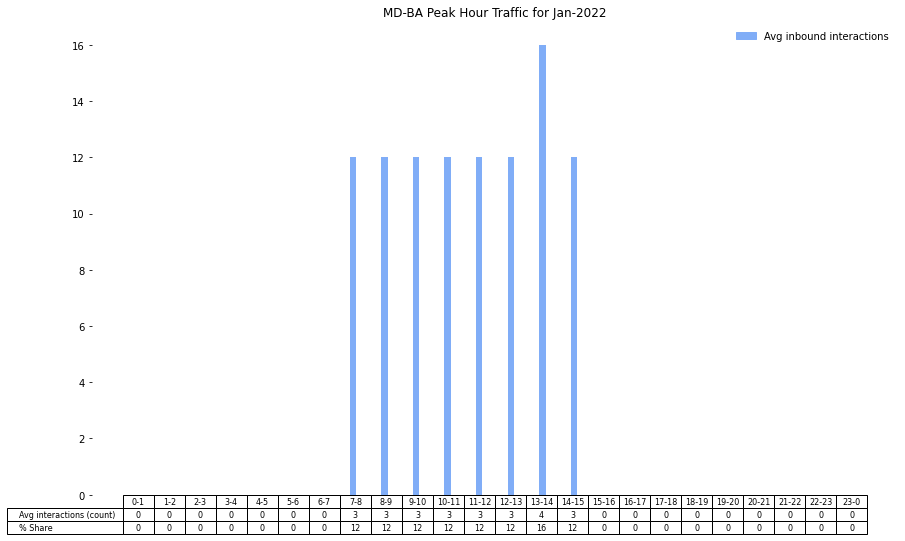

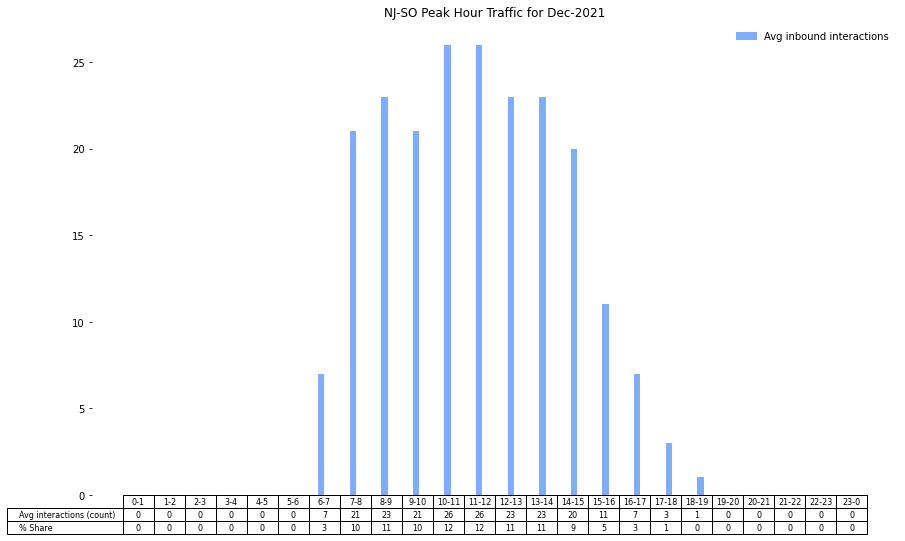

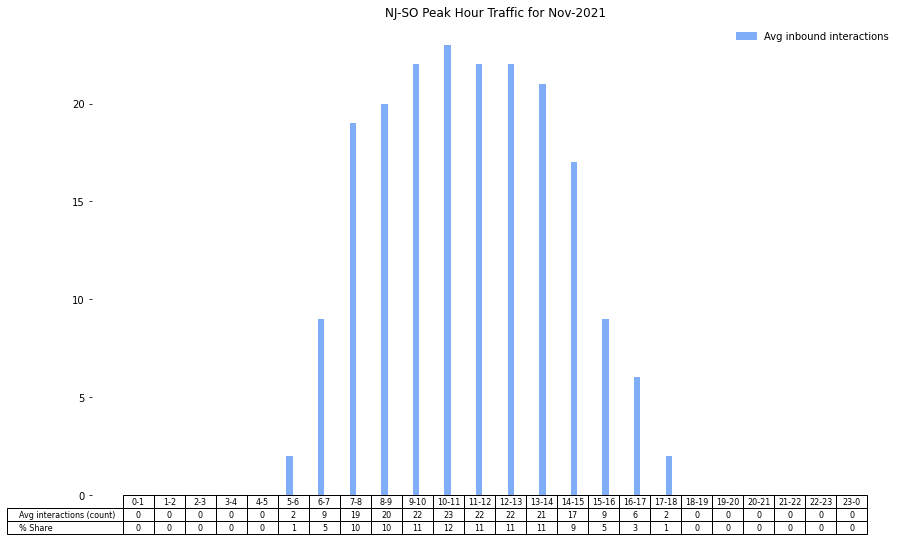

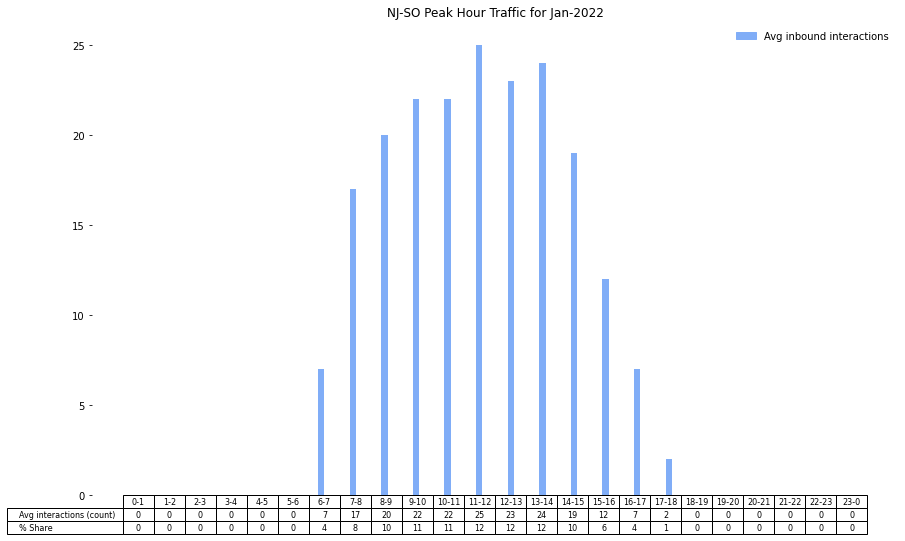

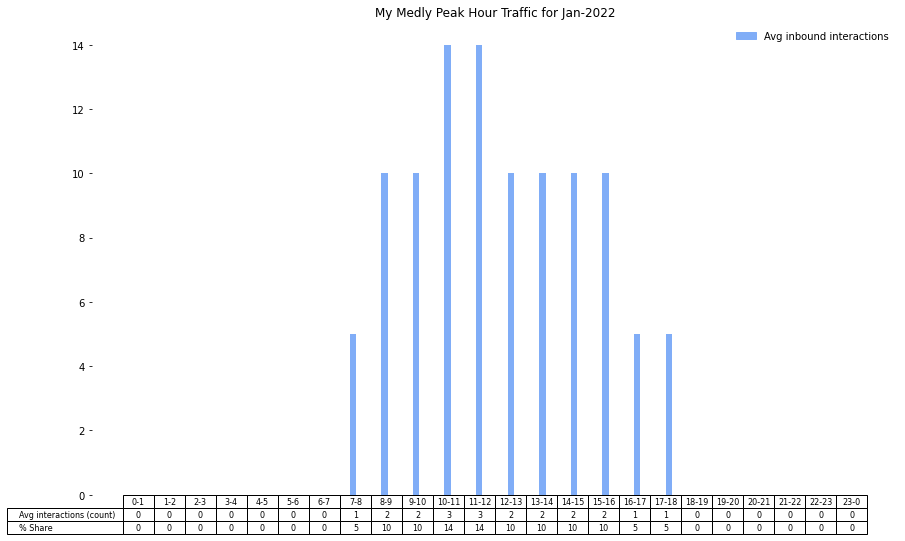

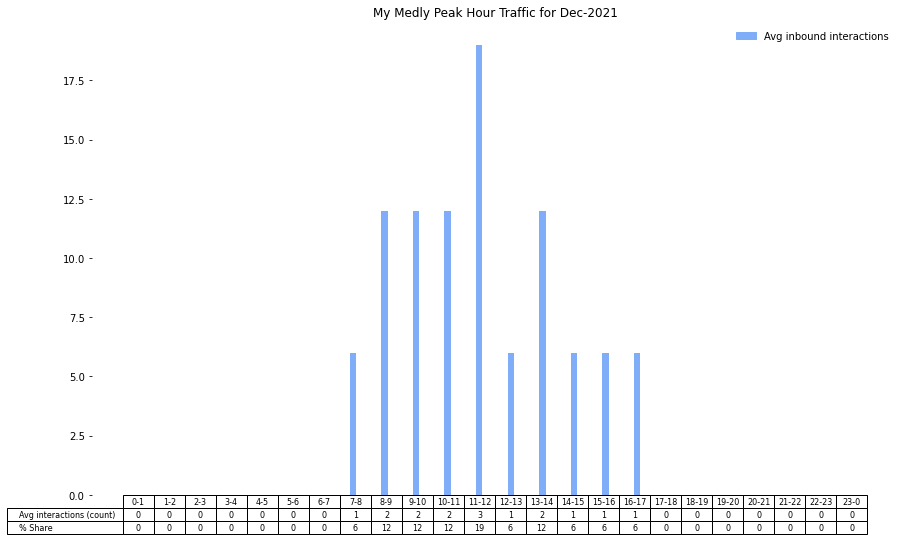

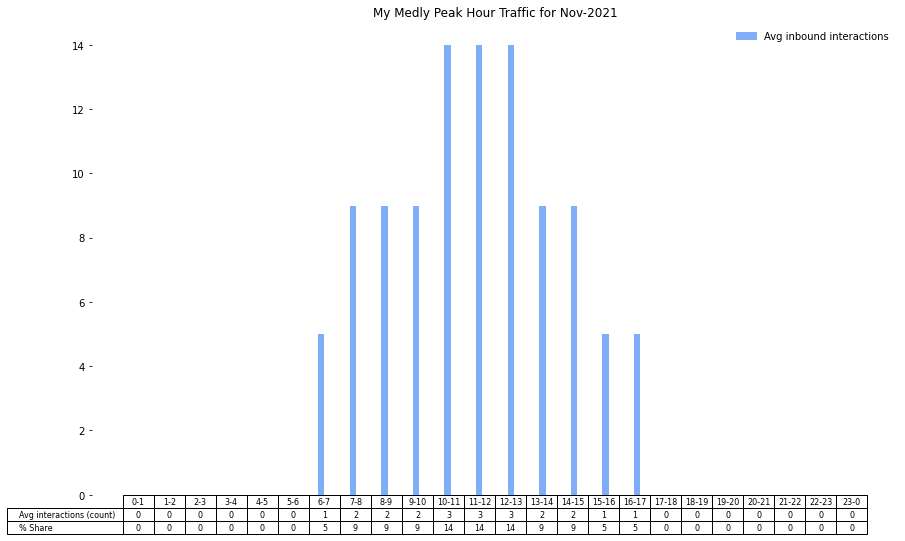

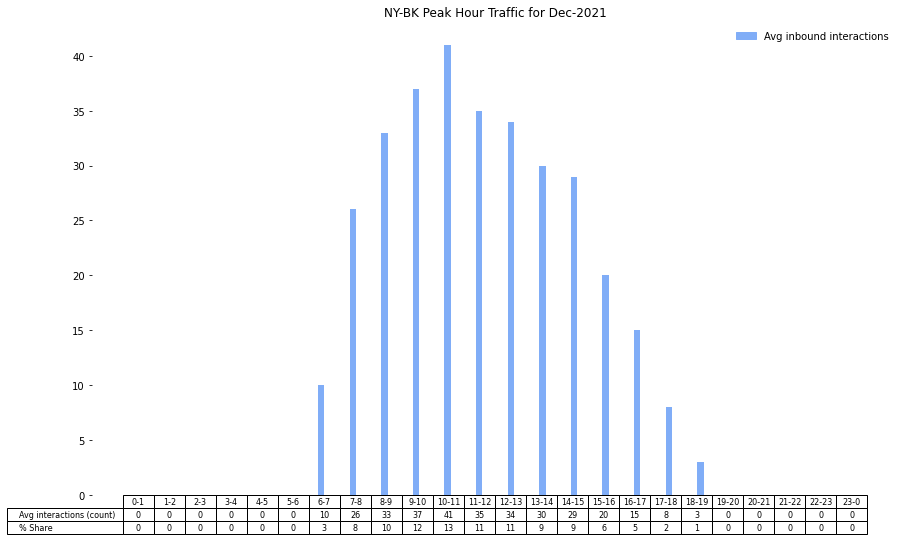

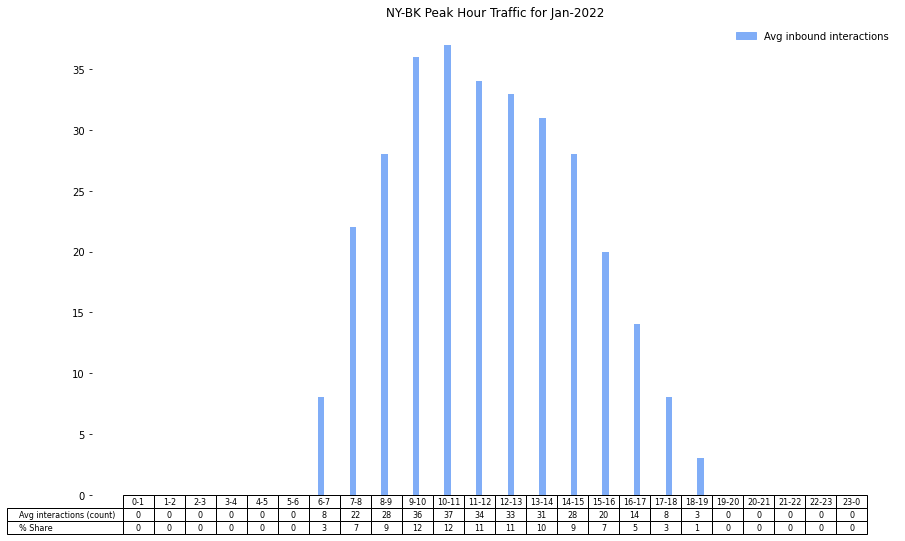

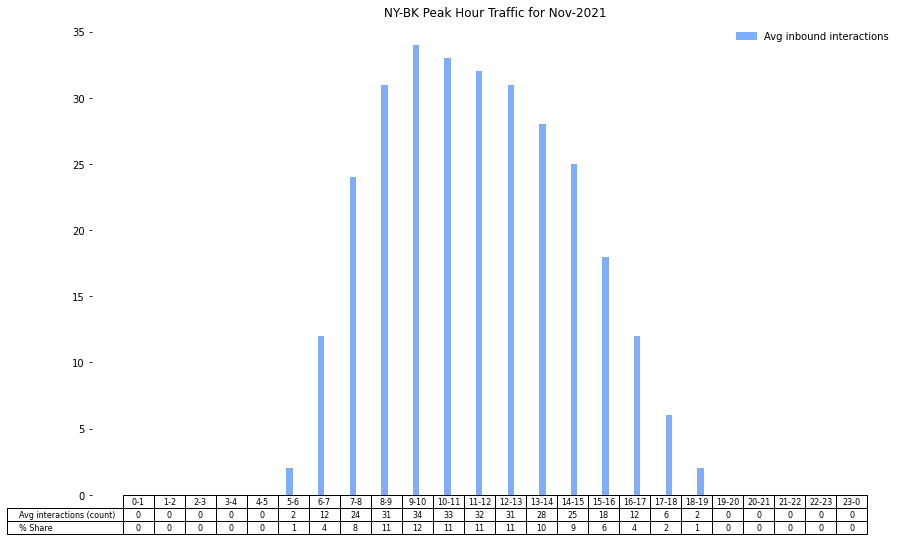

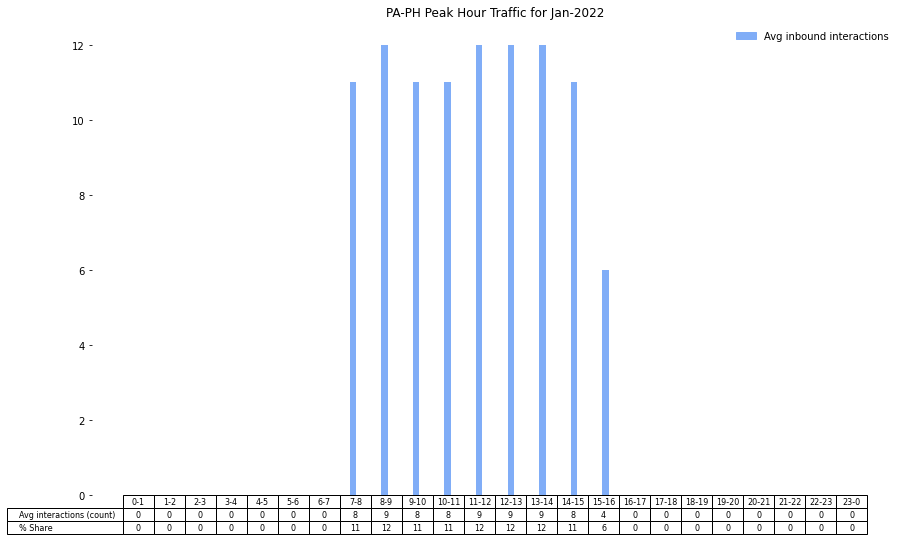

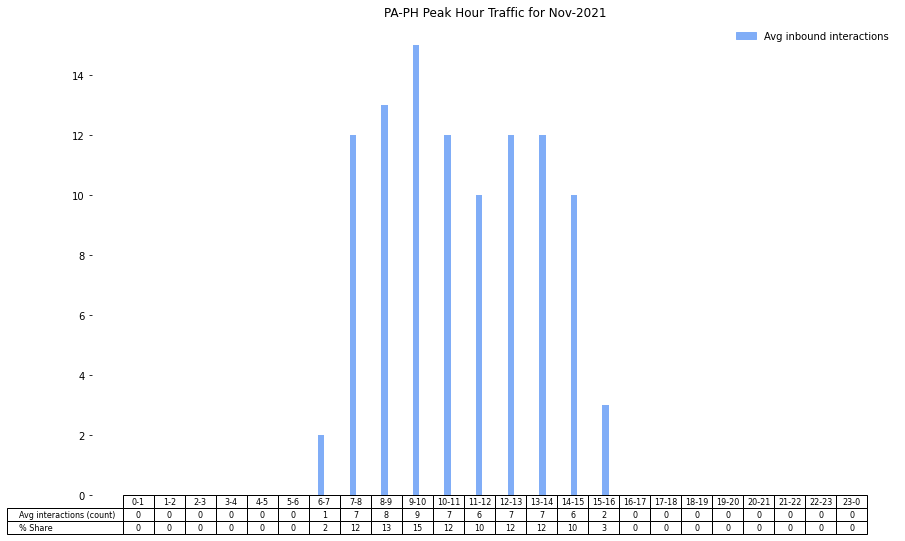

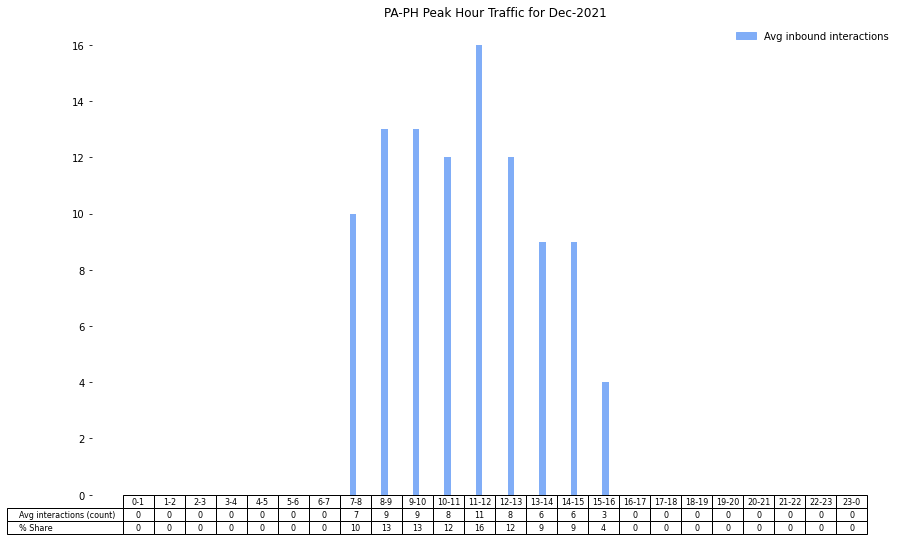

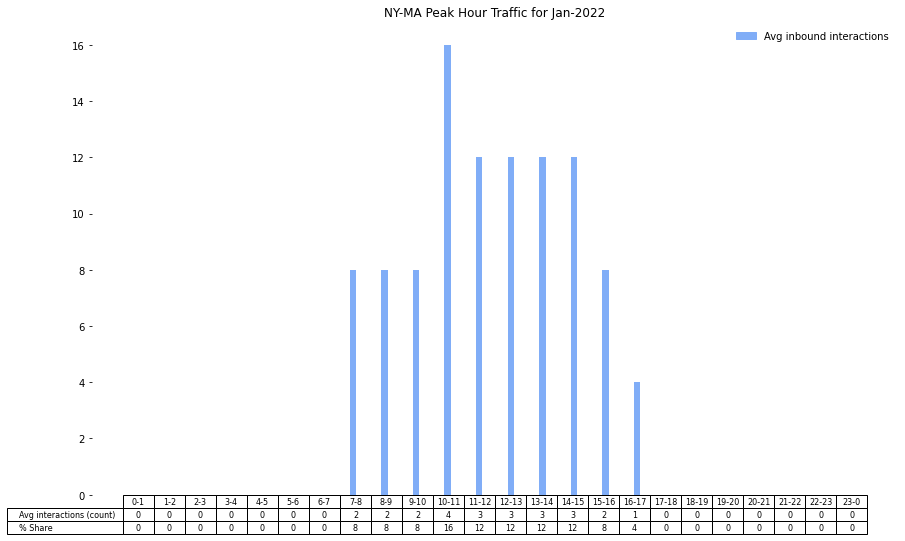

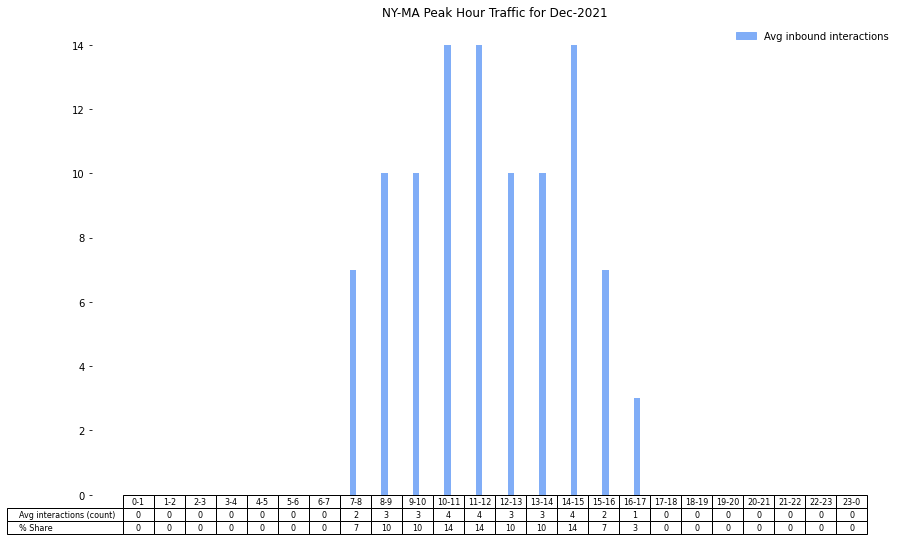

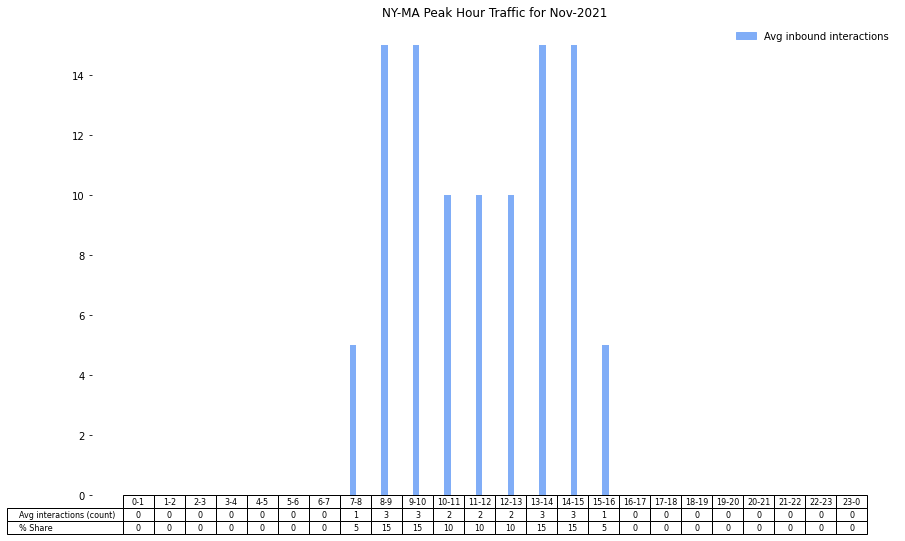

In [67]:

for j in new_peak_loc.queue_name.unique():
    new_df_df = new_peak_loc[new_peak_loc.queue_name == j].reset_index(drop=True).drop('queue_name', axis = 1)
    for i in new_df_df.months.unique() :
        new = new_df_df[new_df_df.months == i].reset_index(drop=True).drop('months', axis = 1)

        new = new[['new_col', 'count_of_calls']].groupby('new_col', sort = False).sum().reset_index()

        plt.figure(figsize=(16,8))

        dd = new.count_of_calls.values.tolist()
#         cc = new.avg_duration.values.tolist()

        data = [[round(elt/sum(dd)*100) for elt in dd], dd]  #share calculation
        columns = new.new_col.values
        rows = ['Avg interactions (count)', '% Share']#['%d year' % x for x in (100, 50, 20, 10, 5)]

        n_rows = len(data)
        index = np.arange(len(columns)) + 0.0
        bar_width = 0.2

    #     # Initialize the vertical-offset for the stacked bar chart.
        y_offset = np.zeros(len(columns))
    #     # Plot bars and create text labels for the table
        cell_text = []
        for row in range(n_rows):
            ax = plt.bar(index, data[row], bar_width, bottom = y_offset, color = blue_color, tick_label=new.count_of_calls)
            y_offset = y_offset + data[row]
            cell_text.append(['%d' % (x) for x in y_offset])
            y_offset = np.zeros(len(columns))
    #     # Reverse colors and text labels to display the last value at the top.

        cell_text.reverse()
        rects = ax.patches


    #     # Add a table at the bottom of the axes
        the_table = plt.table(cellText=cell_text, cellLoc='center', rowLabels=rows, colLabels=columns, loc='bottom', colWidths = [1.0 / 26] * 26)

        the_table.auto_set_font_size(False)
        the_table.set_fontsize(8)

        # Adjust layout to make room for the table:
        plt.subplots_adjust(left=0.2, bottom=0.06)
    #     orange_patch = mpatches.Patch(color='orange', label='outbound call ')
        blue_patch = mpatches.Patch(color=blue_color, label='Avg inbound interactions')
        plt.legend(handles=[blue_patch], loc='upper right', bbox_to_anchor=(1, 1), frameon=False)
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['left'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        plt.gca().spines['bottom'].set_color('none')


        plt.xticks([])
    #     plt.axis('off')
        plt.title(f'{j} Peak Hour Traffic for {i}')

        #change
        v = var.index(i)
        # print(i,str(v+1)+'_'+str(j)+'_kpi_peak_hour.png')
        plt.savefig(output_image_path_KPI_ALL+str(v+1)+'_'+str(j)+'_kpi_12_peak_hour.png', bbox_inches='tight', dpi=300,pad_inches = 0)

#         plt.show()